# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


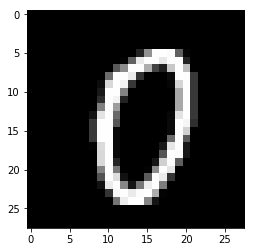

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
import numpy as np

In [0]:
y_train04=y_train[y_train<5]

In [0]:
y_test04=y_test[y_test<5]

In [0]:
y_train59=y_train[y_train>4]

In [0]:
y_test59=y_test[y_test>4]

In [0]:
x_train04=X_train[y_train<5]

In [0]:
x_train59=X_train[y_train>4]

In [0]:
x_test04=X_test[y_test<5]

In [0]:
x_test59=X_test[y_test>4]

In [13]:
x_train04.shape

(30596, 28, 28)

In [14]:
x_train59.shape

(29404, 28, 28)

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [15]:

print(x_train59.shape,'x_train from 5 to 9 ')
print(y_train59.shape,'y_Train 5 to 9 ')
print(x_test04.shape,'x_test 0 to 4')
print(y_test04.shape,'y_test 0 to 4 ')
print(x_train04.shape,'x_Train 0 to 4 ')
print(y_train04.shape,'y_train 0 to 4 ')

print(x_test59.shape,'x_test to 5 to 9 ')
print(y_test59.shape,'y test 5 to 9 ')

(29404, 28, 28) x_train from 5 to 9 
(29404,) y_Train 5 to 9 
(5139, 28, 28) x_test 0 to 4
(5139,) y_test 0 to 4 
(30596, 28, 28) x_Train 0 to 4 
(30596,) y_train 0 to 4 
(4861, 28, 28) x_test to 5 to 9 
(4861,) y test 5 to 9 


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
x_train04 = x_train04.reshape(x_train04.shape[0], 28, 28, 1).astype('float32')
x_test04 = x_test04.reshape(x_test04.shape[0], 28, 28, 1).astype('float32')
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train04 /= 255
x_test04 /= 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [18]:
x_train04.shape

(30596, 28, 28, 1)

In [19]:
x_test04.shape

(5139, 28, 28, 1)

## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
from keras.utils import np_utils

In [0]:
y_train04 = np_utils.to_categorical(y_train04, 5)
y_test04 = np_utils.to_categorical(y_test04, 5)

In [0]:
import keras

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

In [0]:

BATCH_SIZE = 128
EPOCHS = 30

In [25]:
    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.2))

    # Fully Connected Layer
   






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
y_train04.shape

(30596, 5)

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.2))

    # Prediction Layer
    model3.add(Dense(5))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
 

    # Train the model


In [28]:
   model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    # Store Training Results
    

In [0]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30596 samples, validate on 5139 samples
Epoch 1/30





30596/30596 [==============================] - 5s 168us/step - loss: 0.6984 - acc: 0.7713 - val_loss: 0.1892 - val_acc: 0.9397
Epoch 2/30
30596/30596 [==============================] - 3s 98us/step - loss: 0.1589 - acc: 0.9510 - val_loss: 0.1860 - val_acc: 0.9399
Epoch 3/30
30596/30596 [==============================] - 3s 100us/step - loss: 0.1293 - acc: 0.9606 - val_loss: 0.0732 - val_acc: 0.9790
Epoch 4/30
30596/30596 [==============================] - 3s 98us/step - loss: 0.1128 - acc: 0.9649 - val_loss: 0.0625 - val_acc: 0.9823
Epoch 5/30
30596/30596 [==============================] - 3s 97us/step - loss: 0.1010 - acc: 0.9687 - val_loss: 0.0887 - val_acc: 0.9708
Epoch 6/30
30596/30596 [==============================] - 3s 98us/step - loss: 0.0928 - acc: 0.9720 - val_loss: 0.0493 - val_acc: 0.9854
Epoch 7/30
30596/30596 [=

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [33]:
    model3.fit(x_train04, y_train04, batch_size=BATCH_SIZE, nb_epoch=15, 
              validation_data=(x_test04, y_test04), callbacks=callback_list)

Train on 30596 samples, validate on 5139 samples
Epoch 1/15
30596/30596 [==============================] - 3s 105us/step - loss: 0.0261 - acc: 0.9916 - val_loss: 0.0144 - val_acc: 0.9949
Epoch 2/15
30596/30596 [==============================] - 3s 99us/step - loss: 0.0259 - acc: 0.9916 - val_loss: 0.0134 - val_acc: 0.9951
Epoch 3/15
30596/30596 [==============================] - 3s 102us/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0122 - val_acc: 0.9947
Epoch 4/15
30596/30596 [==============================] - 3s 100us/step - loss: 0.0246 - acc: 0.9926 - val_loss: 0.0251 - val_acc: 0.9909
Epoch 5/15
30596/30596 [==============================] - 3s 102us/step - loss: 0.0233 - acc: 0.9920 - val_loss: 0.0130 - val_acc: 0.9946
Epoch 6/15
30596/30596 [==============================] - 3s 100us/step - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0129 - val_acc: 0.9951
Epoch 7/15
30596/30596 [==============================] - 3s 100us/step - loss: 0.0230 - acc: 0.9922 - val_loss: 0.0135 - va

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
y_pred04=model3.predict(x_test04)

In [35]:
model3.evaluate(x_test04,y_test04)

5139/5139 [==============================] - 0s 92us/step


[0.01200639220321548, 0.9963027826425375]

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [37]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model3.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 

 

conv2d_1
False
activation_1
False
conv2d_2
False
activation_2
False
max_pooling2d_1
False
dropout_1
False
flatten_1
False
dense_1
True
activation_3
False
dropout_2
False
dense_2
True
activation_4
False


In [38]:
for layer in model3.layers:
  print (colored(layer.name, 'blue'),colored(layer.trainable, 'red'))

conv2d_1 False
activation_1 False
conv2d_2 False
activation_2 False
max_pooling2d_1 False
dropout_1 False
flatten_1 False
dense_1 True
activation_3 False
dropout_2 False
dense_2 True
activation_4 False


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [39]:
y_train59

array([5, 9, 5, ..., 5, 6, 8], dtype=uint8)

In [0]:
y_train59temp = np_utils.to_categorical(y_train59-5, 5)
y_test59temp = np_utils.to_categorical(y_test59-5, 5)

In [42]:
y_train59temp

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [0]:
y_train59 = np_utils.to_categorical(y_train59-5, 5)
y_test59 = np_utils.to_categorical(y_test59-5, 5)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
x_train59 = x_train59.reshape(x_train59.shape[0], 28, 28, 1).astype('float32')
x_test59 = x_test59.reshape(x_test59.shape[0], 28, 28, 1).astype('float32')
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train59 /=255
x_test59 /=255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [48]:
print('X_Train shape ',x_train59.shape)
print('number of images in  train ',x_train59.shape[0])
print('number of images in  test ',x_test59.shape[0])

X_Train shape  (29404, 28, 28, 1)
number of images in  train  29404
number of images in  test  4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [0]:
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [50]:
    model3.fit(x_train59, y_train59, batch_size=BATCH_SIZE, nb_epoch=15, 
              validation_data=(x_test59, y_test59), callbacks=callback_list)

Train on 29404 samples, validate on 4861 samples
Epoch 1/15
29404/29404 [==============================] - 2s 80us/step - loss: 0.3960 - acc: 0.8776 - val_loss: 0.1589 - val_acc: 0.9484
Epoch 2/15
29404/29404 [==============================] - 2s 65us/step - loss: 0.1913 - acc: 0.9404 - val_loss: 0.1252 - val_acc: 0.9599
Epoch 3/15
29404/29404 [==============================] - 2s 65us/step - loss: 0.1586 - acc: 0.9492 - val_loss: 0.1068 - val_acc: 0.9644
Epoch 4/15
29404/29404 [==============================] - 2s 64us/step - loss: 0.1438 - acc: 0.9550 - val_loss: 0.0992 - val_acc: 0.9679
Epoch 5/15
29404/29404 [==============================] - 2s 65us/step - loss: 0.1284 - acc: 0.9597 - val_loss: 0.0910 - val_acc: 0.9681
Epoch 6/15
29404/29404 [==============================] - 2s 65us/step - loss: 0.1191 - acc: 0.9619 - val_loss: 0.0840 - val_acc: 0.9704
Epoch 7/15
29404/29404 [==============================] - 2s 66us/step - loss: 0.1116 - acc: 0.9629 - val_loss: 0.0797 - val_acc:

In [51]:
model3.evaluate(x_test59,y_test59)

4861/4861 [==============================] - 0s 97us/step


[0.05764189542602074, 0.9794281011033857]

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
#@title Default title text
import pandas as pd

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
twtDF=pd.read_csv('/content/drive/My Drive/tweets.csv',encoding='latin')

### Drop null values
- drop all the rows with null values

In [93]:
twtDF.shape

(9093, 3)

In [0]:
twtDF.dropna(inplace=True)

In [95]:
twtDF.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [96]:
twtDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
twtDF = twtDF.astype(str).apply(lambda x: x.str.lower())


In [98]:
twtDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


In [0]:
import re 

In [0]:
pattern=r'[^a-zA-Z0-9#+_\s]'

print dataframe

In [0]:
twtDF['tweet_text'] = twtDF['tweet_text'].map(lambda x: re.sub(pattern, '', x))

In [0]:
twtDF['tweet_text'] = twtDF['tweet_text'].map(lambda x: x.strip())

In [80]:
twtDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [81]:
twtDF['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
twtDF=twtDF[(twtDF['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion') | (twtDF['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion')]

In [107]:
twtDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


In [89]:
twtDF


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
twtDF['is_there_an_emotion_directed_at_a_brand_or_product'] = twtDF['is_there_an_emotion_directed_at_a_brand_or_product'].map({'positive emotion': 1, 'negative emotion': 0})

In [109]:
twtDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,0
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,1
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,1
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X=twtDF['tweet_text']
y=twtDF['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_trn,x_tst,y_trn,y_tst=train_test_split(X,y,test_size=0.25)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2)


In [139]:
X_train_dtm = vect.fit_transform(x_trn)
X_train_dtm.shape

(2393, 5564)

In [140]:
X_test_dtm = vect.transform(x_tst)
X_test_dtm.shape

(798, 5564)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lR=LogisticRegression()

In [143]:
X_train_dtm.shape


(2393, 5564)

### Fit the classifer
- fit logistic regression classifier

In [144]:
lR.fit(X_train_dtm,y_trn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB

### Fit the classifer
- fit naive bayes classifier

In [0]:
mNB=MultinomialNB()

In [147]:
mNB.fit(X_train_dtm,y_trn)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [148]:
y_tst.shape

(798,)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_prd_lr=lR.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_prd_nb=mNB.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [0]:
from sklearn.metrics import  accuracy_score

In [152]:
accuracy_score(y_tst,y_prd_lr)

0.8796992481203008

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [153]:
accuracy_score(y_tst,y_prd_nb)

0.8609022556390977